In [6]:
import numpy as np
import pandas as pd

# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")
df.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
# Summary statistics
df.describe()
df.info()

# Check missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

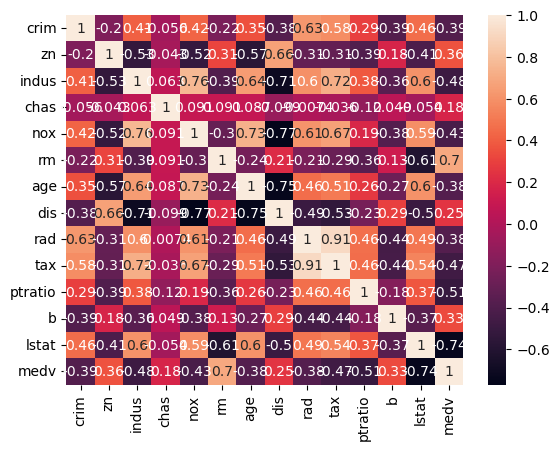

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(), annot=True)
plt.show()

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")

# Select features and target
X = df[['rm', 'lstat', 'ptratio']]
y = df['medv']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


R2 Score: 0.6302528487272828
MSE: 27.114957415580573
Coefficients: [ 4.93311836 -0.56712588 -0.86709475]
Intercept: 14.588099261571088


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")

# Split features & target
X = df.drop(columns=['medv'])
y = df['medv']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R2 Score: 0.6687594935356326
MSE: 24.291119474973478


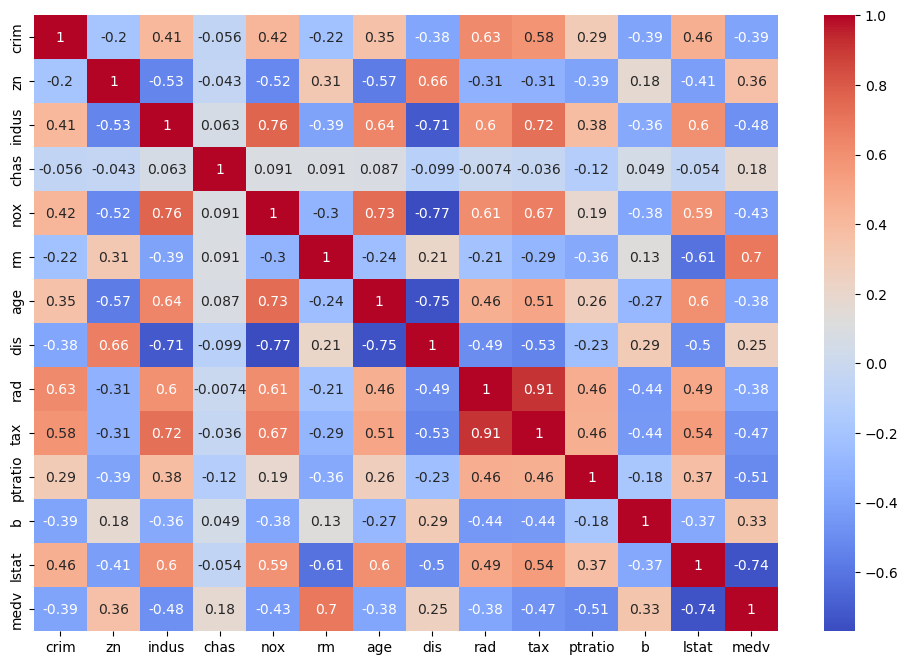

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [13]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=1)
lasso = Lasso(alpha=0.1)

ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

ridge_pred = ridge.predict(X_test)
lasso_pred = lasso.predict(X_test)


In [14]:
print("Ridge R2:", r2_score(y_test, ridge_pred))
print("Lasso R2:", r2_score(y_test, lasso_pred))


Ridge R2: 0.6662221670168522
Lasso R2: 0.6569712802223936


In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)

print("Decision Tree R2:", r2_score(y_test, tree_pred))


Decision Tree R2: 0.8579634380978161


In [16]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("Random Forest R2:", r2_score(y_test, rf_pred))


Random Forest R2: 0.8839525117021145


In [17]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_test)

print("Gradient Boost R2:", r2_score(y_test, gbr_pred))


Gradient Boost R2: 0.9153342280466539


In [20]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

xgb = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=3, random_state=42)
xgb.fit(X_train, y_train)

xgb_pred = xgb.predict(X_test)

print("XGBoost R2:", r2_score(y_test, xgb_pred))


XGBoost R2: 0.926379875724761


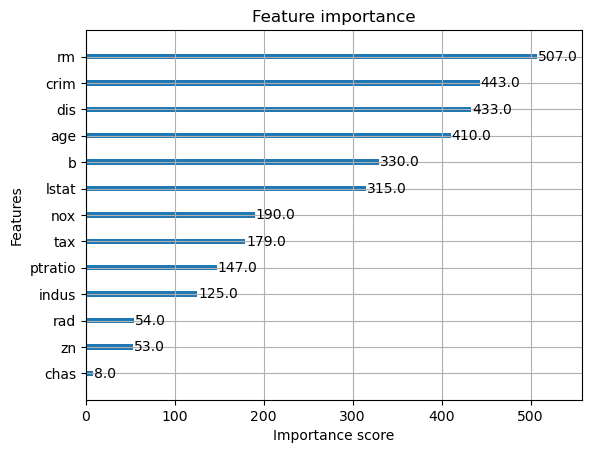

In [21]:
import matplotlib.pyplot as plt
import xgboost as xgb_module

xgb_module.plot_importance(xgb)
plt.show()


In [22]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[200,300,500],
    'learning_rate':[0.01,0.05,0.1],
    'max_depth':[3,4,5],
}

grid = GridSearchCV(estimator=xgb, param_grid=params, cv=3, scoring='r2')
grid.fit(X_train, y_train)

print("Best Score:", grid.best_score_)
print("Best Params:", grid.best_params_)

Best Score: 0.8361715149868698
Best Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 500}


In [23]:
import joblib

joblib.dump(xgb, "house_price_model.pkl")
print("Model saved!")


Model saved!


In [24]:
loaded_model = joblib.load("house_price_model.pkl")
loaded_pred = loaded_model.predict(X_test)

print("Loaded Model R2:", r2_score(y_test, loaded_pred))


Loaded Model R2: 0.926379875724761
